In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
party_colors = {
    'SPD': 'tab:red',
    'CDU': 'black',
    'AfD': 'tab:blue',
    'FDP': 'gold',
    'Bündnis 90/Die Grünen': 'tab:green',
    'Die Linke': 'tab:purple',
    'CSU': 'tab:cyan',
    'Fraktionslos': 'tab:gray'
}

start_end_date = [['01/1/2020','01/31/2020'],
                  ['02/1/2020', '02/29/2020'],
                  ['03/1/2020', '03/31/2020'],
                  ['04/1/2020', '04/30/2020'],
                  ['05/1/2020', '05/31/2020'],
                  ['06/1/2020', '06/30/2020'],
                  ['07/1/2020', '07/31/2020'],
                  ['08/1/2020', '08/31/2020'],
                  ['09/1/2020', '09/30/2020'],
                  ['10/1/2020', '10/31/2020'],
                  ['11/1/2020', '11/30/2020'],
                  ['12/1/2020', '12/31/2020'],]


heidenelkenrot = '#9C004B'
df_annotation = pd.read_csv('../dataset_description/annotation/covid_tweets_annotation.csv')
df = pd.DataFrame(df_annotation)

def get_plot(data, dates):
    plt.figure(figsize=(25,8))
    sns.barplot(data.index, data.values, alpha=0.8, color=heidenelkenrot)
    plt.ylabel('Count', fontsize=17)
    plt.xlabel('Content', fontsize=17)
    plt.tick_params(labelsize=17)

def get_plot_parties(data, dates):
    fig, ax = plt.subplots(figsize=(25,8))
    sns.barplot(x='annotation_qualifier', y='count', hue='party', data=data, palette=party_colors)
    plt.ylabel('Count', fontsize=17)
    plt.xlabel('Content', fontsize=17)
    plt.tick_params(labelsize=17)
    plt.show()


In [3]:
import json
TWEETS = '../filtered_data/covid_tweets_by_politician'

def get_politicians_list():
    with open('../../assets/all_politicians.json', 'r', encoding='utf-8') as infile:
        politicians_list = []
        f_content = json.load(infile)
        politicians_list = [p for p in f_content]
        return politicians_list
politicians = get_politicians_list()

def get_party(screen_name):
    for p in politicians:
        if str(p['screen_name']) == str(screen_name):
            return p['Partei']

dates = []

def read_tweets(tweet_id):
    for entry in politicians:
        f_path = TWEETS + '/' + entry['screen_name'] + '.json' 
        if os.path.isfile(f_path):
            with open(f_path, 'r', encoding='utf-8') as infile:
                f_content = json.load(infile)
                if f_content != []:
                    for tweet in f_content: 
                        if str(tweet_id) == str(tweet.get('id_')):
                            dates.append(tweet.get('raw_data').get('created_at'))
                            return get_party(entry['screen_name'])


def get_relevant_informations(df):
    parties_list = []
    for index, row in df.iterrows():
        parties_list.append(read_tweets(row['tweet_id']))
    df['party'] = parties_list
    df['date'] = dates
    df.to_csv(r'annotations_with_dates_and_parties.csv')
    return df


def filter_rows_by_values(df, col, values, boolean):
    return df[df[col].isin(values) == boolean]



In [4]:

# All data

df_copy = df_annotation.copy()
df_copy = df_copy.drop(['link', 'tweet_content', 'annotation_sentiment', 'annotation_emotion'], axis='columns')
df_copy = get_relevant_informations(df_copy)
df_copy = df_copy.drop(['tweet_id', 'date'], axis='columns')
annotations = ((df_copy['annotation_qualifier'].value_counts(sort=True, ascending=False))).index.to_list()
df_relevant_columns = df_copy.groupby(['party'])['annotation_qualifier'].value_counts(sort=True, ascending=False).unstack().fillna(0)
df_relevant_columns = df_relevant_columns.rename_axis(None, axis=1)
data_annotation = df_relevant_columns.reset_index().melt(id_vars=['party'], value_vars=annotations, var_name='annotation_qualifier', value_name='count')
fig, ax = plt.subplots(figsize=(25,8))
sns.barplot(x='annotation_qualifier', y='count', hue='party', data=data_annotation, palette=party_colors)
plt.ylabel('Count', fontsize=25)
plt.xlabel('', fontsize=2)
plt.tick_params(labelsize=24)
plt.legend(prop={'size': 20})
plt.show()

KeyboardInterrupt: 

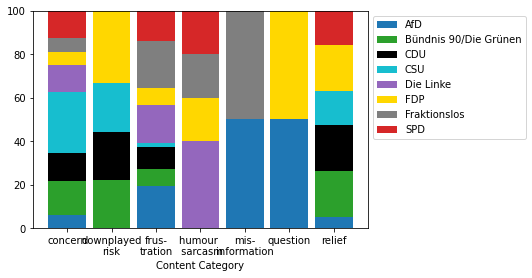

In [7]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd

r = [0,1,2,3,4,5,6]


df_annotation = pd.read_csv('annotations_with_dates_and_parties.csv')
df_annotation = df_annotation.drop(['tweet_id', 'date'], axis='columns')
annotations = ((df_annotation['annotation_qualifier'].value_counts(sort=True, ascending=False))).index.to_list()
df = df_annotation.groupby(['annotation_qualifier'])['party'].value_counts(sort=True, ascending=False).unstack().fillna(0)
# From raw value to percentage
totals = [i+j+k+l+m+n+o+p for i,j,k,l,m,n,o,p in zip(df['AfD'], df['Bündnis 90/Die Grünen'], df['CDU'], df['CSU'], df['Die Linke'], df['FDP'], df['Fraktionslos'], df['SPD'])]
afd = [i / j * 100 for i,j in zip(df['AfD'], totals)]
green = [i / j * 100 for i,j in zip(df['Bündnis 90/Die Grünen'], totals)]
cdu = [i / j * 100 for i,j in zip(df['CDU'], totals)]
csu = [i / j * 100 for i,j in zip(df['CSU'], totals)]
link = [i / j * 100 for i,j in zip(df['Die Linke'], totals)]
fdp = [i / j * 100 for i,j in zip(df['FDP'], totals)]
independent = [i / j * 100 for i,j in zip(df['Fraktionslos'], totals)]
spd = [i / j * 100 for i,j in zip(df['SPD'], totals)]

# plot
barWidth = 0.85
names = ('concern', 'downplayed\nrisk', 'frus-\ntration', 'humour \n sarcasm', 'mis-\ninformation', 'question', 'relief')
plt.bar(r, afd, color='tab:blue', width=barWidth, label='AfD')
plt.bar(r, green, bottom=afd, color='tab:green', width=barWidth, label='Bündnis 90/Die Grünen')
plt.bar(r, cdu, bottom=[i+j for i,j in zip(afd, green)], color='black', width=barWidth, label='CDU')
plt.bar(r, csu, bottom=[i+j+k for i,j,k in zip(afd, green, cdu)], color='tab:cyan', width=barWidth, label='CSU')
plt.bar(r, link, bottom=[i+j+k+l for i,j,k,l in zip(afd, green, cdu, csu)], color='tab:purple', width=barWidth, label='Die Linke')
plt.bar(r, fdp, bottom=[i+j+k+l+m for i,j,k,l,m in zip(afd, green, cdu, csu, link)], color='gold', width=barWidth, label='FDP')
plt.bar(r, independent, bottom=[i+j+k+l+m+n for i,j,k,l,m,n in zip(afd, green, cdu, csu, link, fdp)], color='tab:gray', width=barWidth, label='Fraktionslos')
plt.bar(r, spd, bottom=[i+j+k+l+m+n+o for i,j,k,l,m,n,o in zip(afd, green, cdu, csu, link, fdp, independent)], color='tab:red', width=barWidth, label='SPD')


# Custom x axis
plt.xticks(r, names)
plt.xlabel("Content Category")
# Add a legend
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)


# Show graphic
plt.show()

<ipython-input-35-0145277d3714>:53: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])


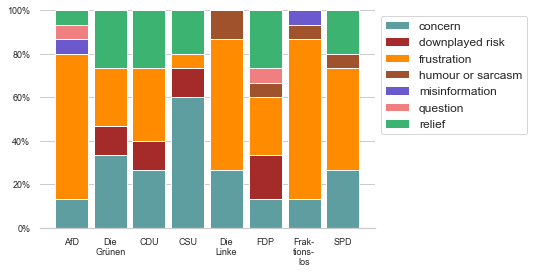

In [35]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
from cycler import cycler

r = [0,1,2,3,4,5,6,7]

# Data
df_annotation = pd.read_csv('annotations_with_dates_and_parties.csv')
df_annotation = df_annotation.drop(['tweet_id', 'date'], axis='columns')
annotations = ((df_annotation['annotation_qualifier'].value_counts(sort=True, ascending=False))).index.to_list()
df = df_annotation.groupby(['party'])['annotation_qualifier'].value_counts(sort=True, ascending=False).unstack().fillna(0)

# From raw value to percentage
totals = [i+j+k+l+m+n+o for i,j,k,l,m,n,o in zip(df['concern'], df['downplayed risk'], df['frustration'], df['humour or sarcasm'], df['misinformation'], df['question'], df['relief'])]
concern = [i / j * 100 for i,j in zip(df['concern'], totals)]
risk = [i / j * 100 for i,j in zip(df['downplayed risk'], totals)]
frustration = [i / j * 100 for i,j in zip(df['frustration'], totals)]
humor = [i / j * 100 for i,j in zip(df['humour or sarcasm'], totals)]
misinformation = [i / j * 100 for i,j in zip(df['misinformation'], totals)]
question = [i / j * 100 for i,j in zip(df['question'], totals)]
relief = [i / j * 100 for i,j in zip(df['relief'], totals)]

#Colours of colourmap
from pylab import *
cmap = cm.get_cmap('Set2', 7)    # PiYG
colour = []
for i in range(cmap.N):
    rgba = cmap(i)
    colour.append(matplotlib.colors.rgb2hex(rgba))

# plot

barWidth = 0.85
names = ('AfD','Die\nGrünen','CDU','CSU','Die\nLinke', 'FDP', 'Frak-\ntions-\nlos', 'SPD')
plt.bar(r, concern, width=barWidth, color='cadetblue', edgecolor='white', label='concern')
plt.bar(r, risk, bottom=concern, width=barWidth, color='brown', label='downplayed risk')
plt.bar(r, frustration, bottom=[i+j for i,j in zip(concern, risk)], width=barWidth, color='darkorange', label='frustration')
plt.bar(r, humor, bottom=[i+j+k for i,j,k in zip(concern, risk, frustration)], width=barWidth, color='sienna', label='humour or sarcasm')
plt.bar(r, misinformation, bottom=[i+j+k+l for i,j,k,l in zip(concern, risk, frustration, humor)], width=barWidth, color='slateblue', label='misinformation')
plt.bar(r, question, bottom=[i+j+k+l+m for i,j,k,l,m in zip(concern, risk, frustration, humor, misinformation)], width=barWidth, color='lightcoral', label='question')
plt.bar(r, relief, bottom=[i+j+k+l+m+n for i,j,k,l,m,n in zip(concern, risk, frustration, humor, misinformation, question)],  color='mediumseagreen', width=barWidth, label='relief')

colors = ['darkcyan', 'sienna', 'khaki', 'darkgreen', 'slateblue', 'lightcoral']
plt.gca().set_prop_cycle(cycler('color', colors))
plt.xticks(r, names)
leg = plt.legend()
leg.get_frame().set_linewidth(3.0)
leg.get_frame().set_edgecolor('b')
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1, prop={'size': 12}, frameon=True)
plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])
plt.tick_params(axis='y', labelsize=9)
plt.tick_params(axis='x', labelsize=9)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['left'].set_visible(False)
sns.set_theme(style='whitegrid')
plt.show()

<ipython-input-67-d736aeee1373>:53: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])


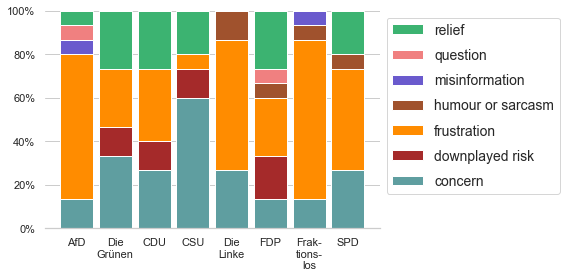

In [67]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
from cycler import cycler

r = [0,1,2,3,4,5,6,7]

# Data
df_annotation = pd.read_csv('annotations_with_dates_and_parties.csv')
df_annotation = df_annotation.drop(['tweet_id', 'date'], axis='columns')
annotations = ((df_annotation['annotation_qualifier'].value_counts(sort=True, ascending=False))).index.to_list()
df = df_annotation.groupby(['party'])['annotation_qualifier'].value_counts(sort=True, ascending=False).unstack().fillna(0)

# From raw value to percentage
totals = [i+j+k+l+m+n+o for i,j,k,l,m,n,o in zip(df['concern'], df['downplayed risk'], df['frustration'], df['humour or sarcasm'], df['misinformation'], df['question'], df['relief'])]
concern = [i / j * 100 for i,j in zip(df['concern'], totals)]
risk = [i / j * 100 for i,j in zip(df['downplayed risk'], totals)]
frustration = [i / j * 100 for i,j in zip(df['frustration'], totals)]
humor = [i / j * 100 for i,j in zip(df['humour or sarcasm'], totals)]
misinformation = [i / j * 100 for i,j in zip(df['misinformation'], totals)]
question = [i / j * 100 for i,j in zip(df['question'], totals)]
relief = [i / j * 100 for i,j in zip(df['relief'], totals)]

# plot
barWidth = 0.85
names = ('AfD','Die\nGrünen','CDU','CSU','Die\nLinke', 'FDP', 'Frak-\ntions-\nlos', 'SPD')
plt.bar(r, concern, width=barWidth, color='cadetblue', edgecolor='white', label='concern')
plt.bar(r, risk, bottom=concern, width=barWidth, color='brown', label='downplayed risk')
plt.bar(r, frustration, bottom=[i+j for i,j in zip(concern, risk)], width=barWidth, color='darkorange', label='frustration')
plt.bar(r, humor, bottom=[i+j+k for i,j,k in zip(concern, risk, frustration)], width=barWidth, color='sienna', label='humour or sarcasm')
plt.bar(r, misinformation, bottom=[i+j+k+l for i,j,k,l in zip(concern, risk, frustration, humor)], width=barWidth, color='slateblue', label='misinformation')
plt.bar(r, question, bottom=[i+j+k+l+m for i,j,k,l,m in zip(concern, risk, frustration, humor, misinformation)], width=barWidth, color='lightcoral', label='question')
plt.bar(r, relief, bottom=[i+j+k+l+m+n for i,j,k,l,m,n in zip(concern, risk, frustration, humor, misinformation, question)],  color='mediumseagreen', width=barWidth, label='relief')

colors = ['darkcyan', 'sienna', 'khaki', 'darkgreen', 'slateblue', 'lightcoral']
plt.gca().set_prop_cycle(cycler('color', colors))


plt.xticks(r, names)

leg = plt.legend()
leg.get_frame().set_linewidth(4.0)
leg.get_frame().set_edgecolor('b')

handles, labels = plt.gca().get_legend_handles_labels()
order = [6,5,4,3,2,1,0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc='upper left', bbox_to_anchor=(1,1), ncol=1, labelspacing=0.8, handlelength=2.2, prop={'size': 14, 'weight': 'roman'}, frameon=True)



plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])
plt.tick_params(axis='y', labelsize=11)
plt.tick_params(axis='x', labelsize=11)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['left'].set_visible(False)
sns.set_theme(style='whitegrid')
plt.show()

<ipython-input-65-acbba9543601>:50: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])


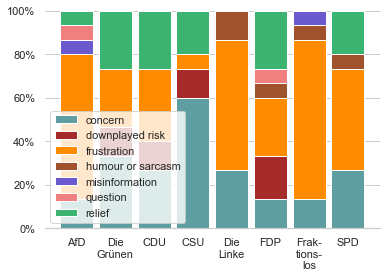

In [65]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
from cycler import cycler

r = [0,1,2,3,4,5,6,7]

# Data
df_annotation = pd.read_csv('annotations_with_dates_and_parties.csv')
df_annotation = df_annotation.drop(['tweet_id', 'date'], axis='columns')
annotations = ((df_annotation['annotation_qualifier'].value_counts(sort=True, ascending=False))).index.to_list()
df = df_annotation.groupby(['party'])['annotation_qualifier'].value_counts(sort=True, ascending=False).unstack().fillna(0)

# From raw value to percentage
totals = [i+j+k+l+m+n+o for i,j,k,l,m,n,o in zip(df['concern'], df['downplayed risk'], df['frustration'], df['humour or sarcasm'], df['misinformation'], df['question'], df['relief'])]
concern = [i / j * 100 for i,j in zip(df['concern'], totals)]
risk = [i / j * 100 for i,j in zip(df['downplayed risk'], totals)]
frustration = [i / j * 100 for i,j in zip(df['frustration'], totals)]
humor = [i / j * 100 for i,j in zip(df['humour or sarcasm'], totals)]
misinformation = [i / j * 100 for i,j in zip(df['misinformation'], totals)]
question = [i / j * 100 for i,j in zip(df['question'], totals)]
relief = [i / j * 100 for i,j in zip(df['relief'], totals)]

#Colours of colourmap
from pylab import *
cmap = cm.get_cmap('Set2', 7)    # PiYG
colour = []
for i in range(cmap.N):
    rgba = cmap(i)
    colour.append(matplotlib.colors.rgb2hex(rgba))

# plot

barWidth = 0.85
names = ('AfD','Die\nGrünen','CDU','CSU','Die\nLinke', 'FDP', 'Frak-\ntions-\nlos', 'SPD')
plt.bar(r, concern, width=barWidth, color='cadetblue', edgecolor='white', label='concern')
plt.bar(r, risk, bottom=concern, width=barWidth, color='brown', label='downplayed risk')
plt.bar(r, frustration, bottom=[i+j for i,j in zip(concern, risk)], width=barWidth, color='darkorange', label='frustration')
plt.bar(r, humor, bottom=[i+j+k for i,j,k in zip(concern, risk, frustration)], width=barWidth, color='sienna', label='humour or sarcasm')
plt.bar(r, misinformation, bottom=[i+j+k+l for i,j,k,l in zip(concern, risk, frustration, humor)], width=barWidth, color='slateblue', label='misinformation')
plt.bar(r, question, bottom=[i+j+k+l+m for i,j,k,l,m in zip(concern, risk, frustration, humor, misinformation)], width=barWidth, color='lightcoral', label='question')
plt.bar(r, relief, bottom=[i+j+k+l+m+n for i,j,k,l,m,n in zip(concern, risk, frustration, humor, misinformation, question)],  color='mediumseagreen', width=barWidth, label='relief')

colors = ['darkcyan', 'sienna', 'khaki', 'darkgreen', 'slateblue', 'lightcoral']
plt.gca().set_prop_cycle(cycler('color', colors))
plt.legend(markerscale=9.0) 
plt.xticks(r, names)  
plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])
plt.tick_params(axis='y', labelsize=11)
plt.tick_params(axis='x', labelsize=11)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['left'].set_visible(False)
sns.set_theme(style='whitegrid')
plt.show()

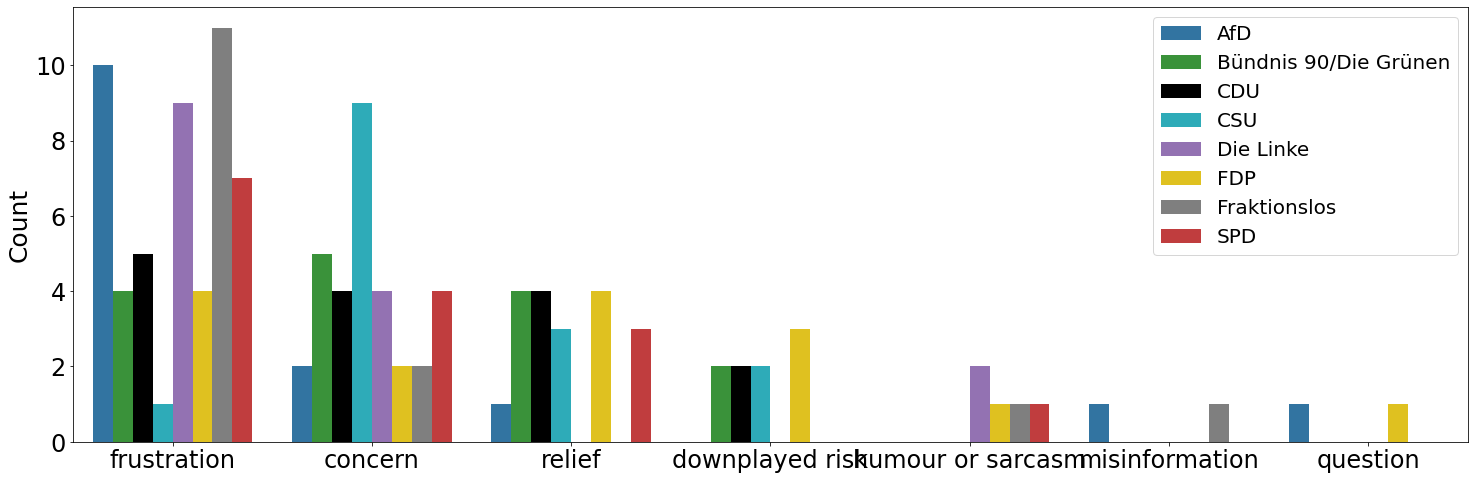

In [9]:
# All data
df_annotation = pd.read_csv('annotations_with_dates_and_parties.csv')
df_annotation = df_annotation.drop(['tweet_id', 'date'], axis='columns')
annotations = ((df_annotation['annotation_qualifier'].value_counts(sort=True, ascending=False))).index.to_list()
df_relevant_columns = df_annotation.groupby(['party'])['annotation_qualifier'].value_counts(sort=True, ascending=False).unstack().fillna(0)
df_relevant_columns = df_relevant_columns.rename_axis(None, axis=1)
data_annotation = df_relevant_columns.reset_index().melt(id_vars=['party'], value_vars=annotations, var_name='annotation_qualifier', value_name='count')
fig, ax = plt.subplots(figsize=(25,8))
sns.barplot(x='annotation_qualifier', y='count', hue='party', data=data_annotation, palette=party_colors)
plt.ylabel('Count', fontsize=25)
plt.xlabel('', fontsize=2)
plt.tick_params(labelsize=24)
plt.legend(prop={'size': 20})
plt.show()

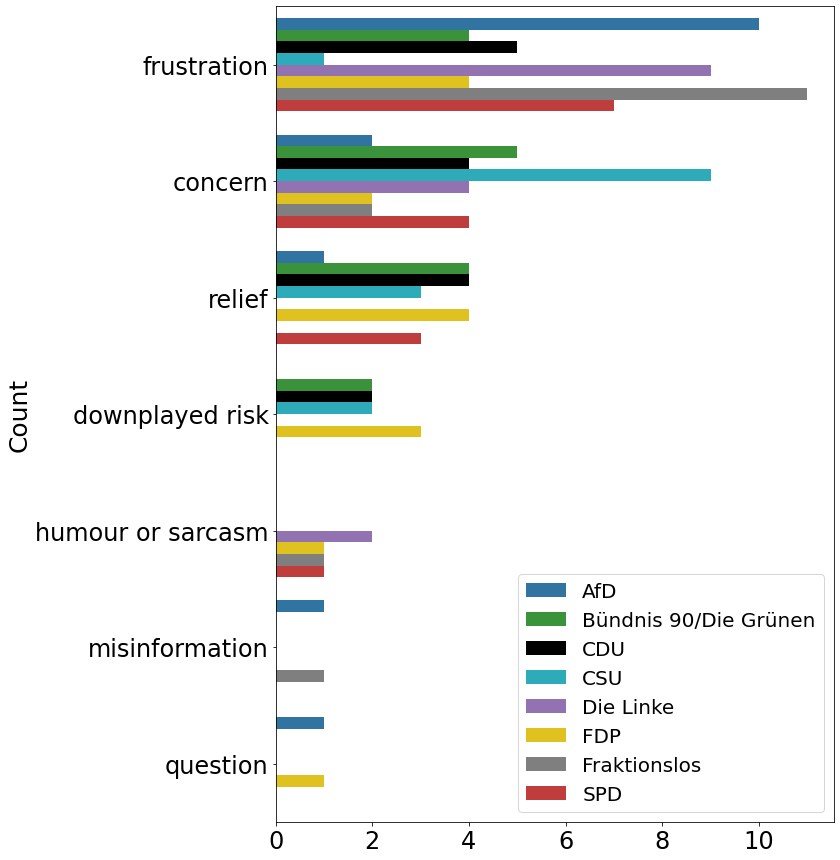

In [10]:
# All data
df_annotation = pd.read_csv('annotations_with_dates_and_parties.csv')
df_annotation = df_annotation.drop(['tweet_id', 'date'], axis='columns')
annotations = ((df_annotation['annotation_qualifier'].value_counts(sort=True, ascending=False))).index.to_list()
df_relevant_columns = df_annotation.groupby(['party'])['annotation_qualifier'].value_counts(sort=True, ascending=False).unstack().fillna(0)
df_relevant_columns = df_relevant_columns.rename_axis(None, axis=1)
data_annotation = df_relevant_columns.reset_index().melt(id_vars=['party'], value_vars=annotations, var_name='annotation_qualifier', value_name='count')
fig, ax = plt.subplots(figsize=(10, 15))
sns.barplot(x='count', y='annotation_qualifier', hue='party', data=data_annotation, palette=party_colors)
plt.ylabel('Count', fontsize=25)
plt.xlabel('', fontsize=2)
plt.tick_params(labelsize=24)
plt.legend(prop={'size': 20})
plt.show()


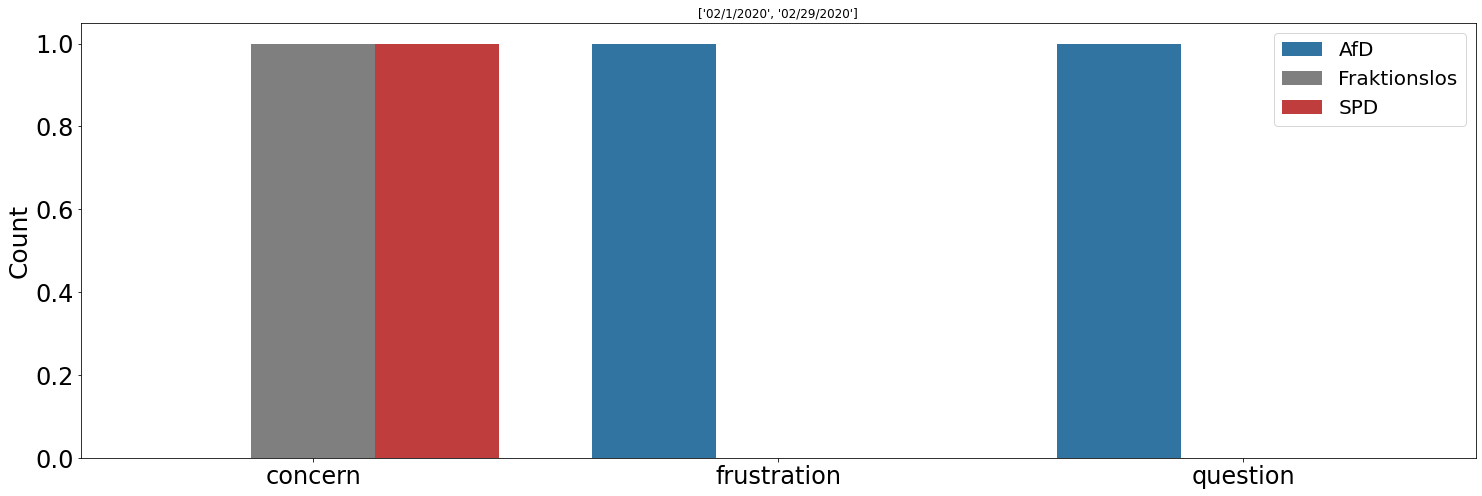

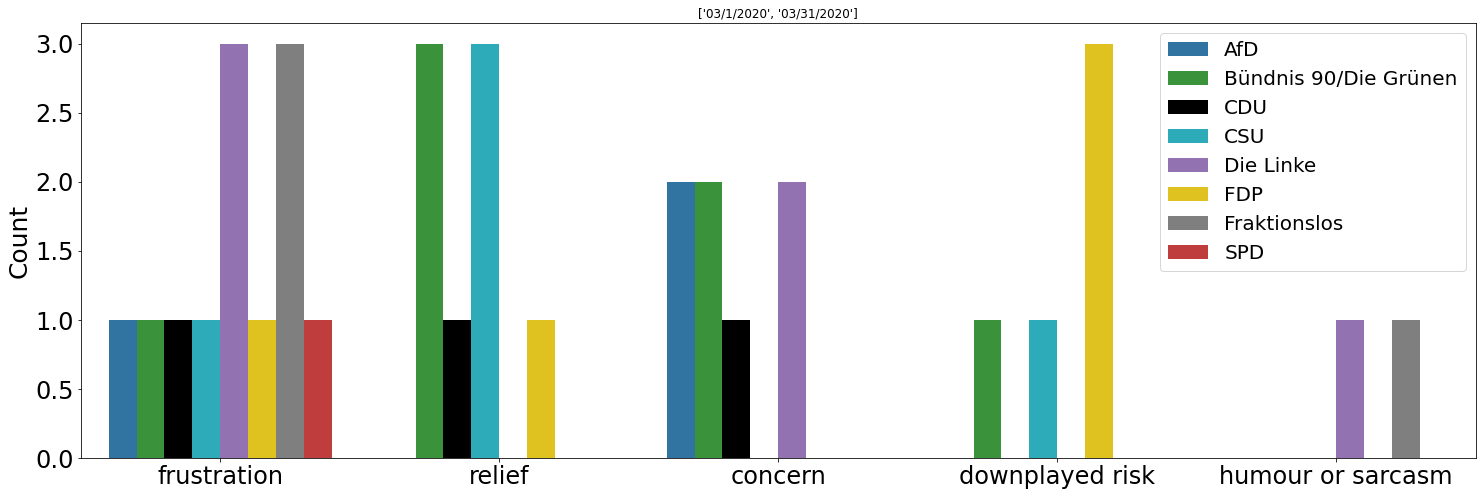

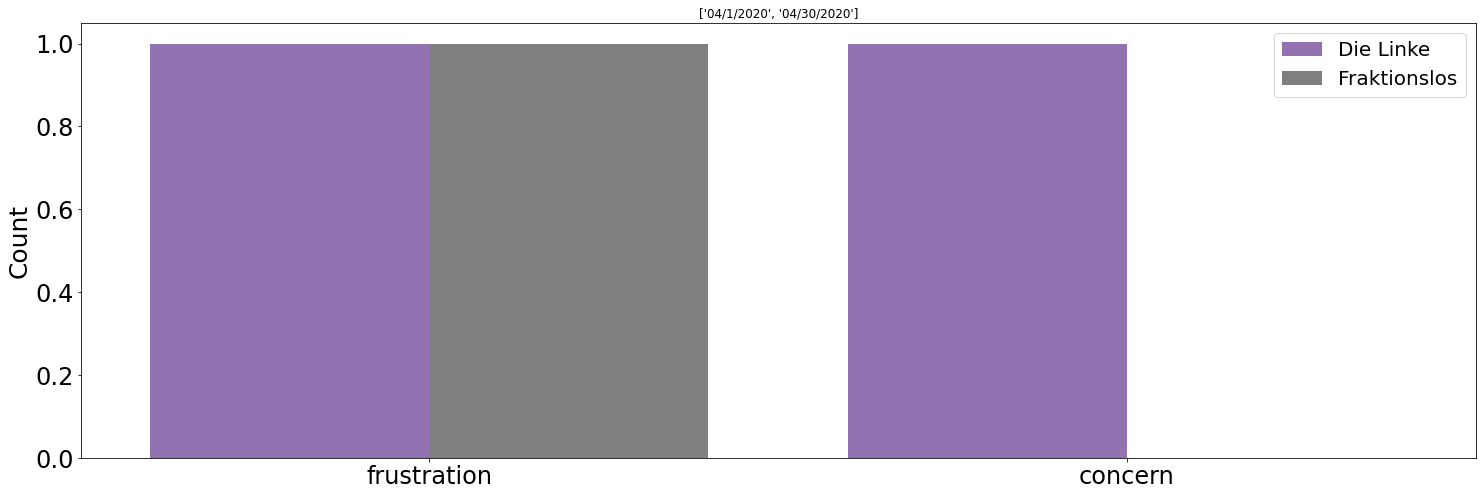

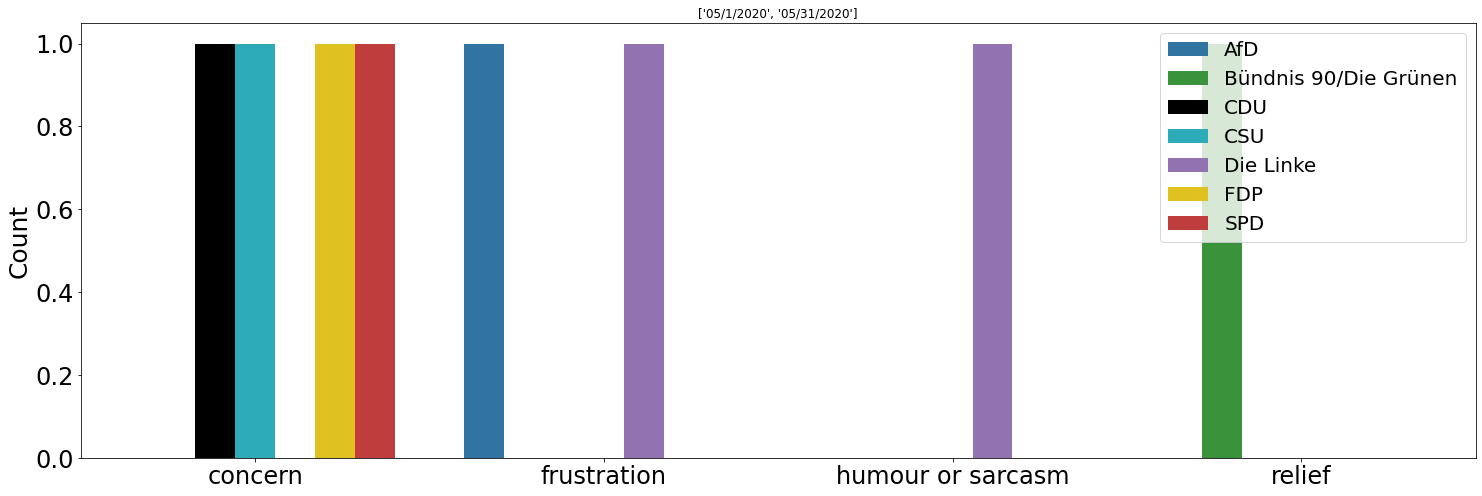

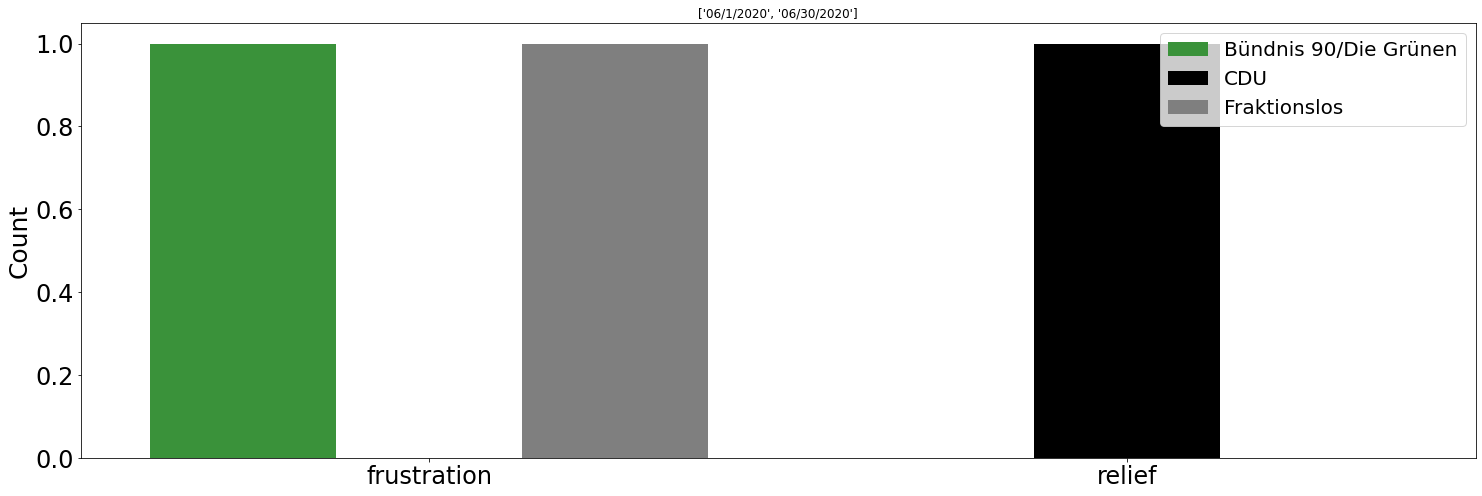

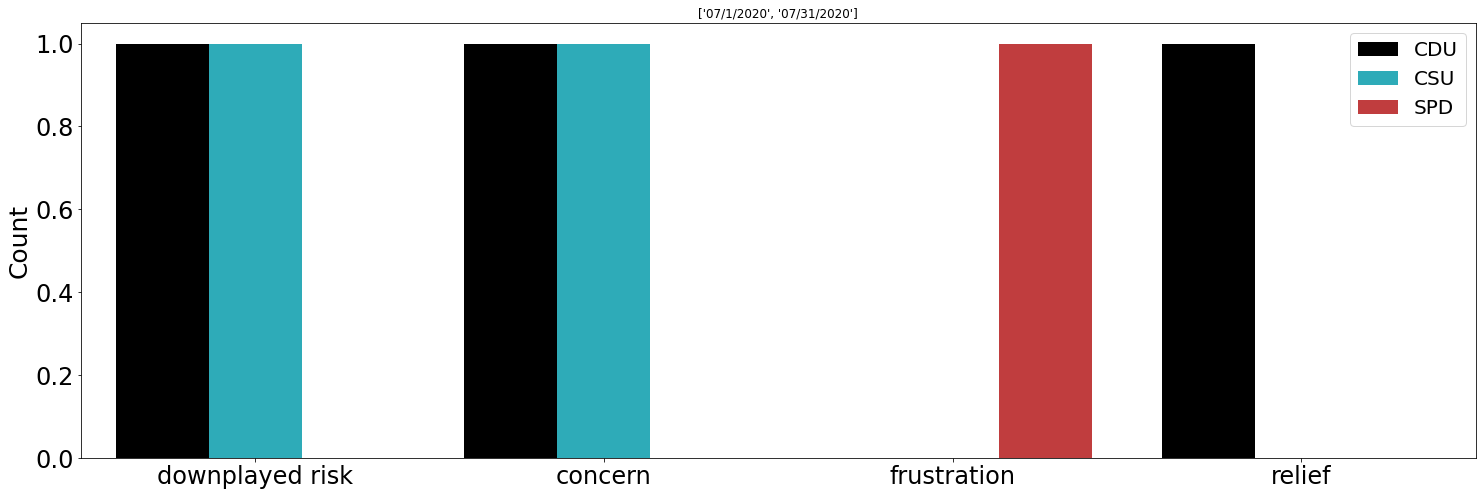

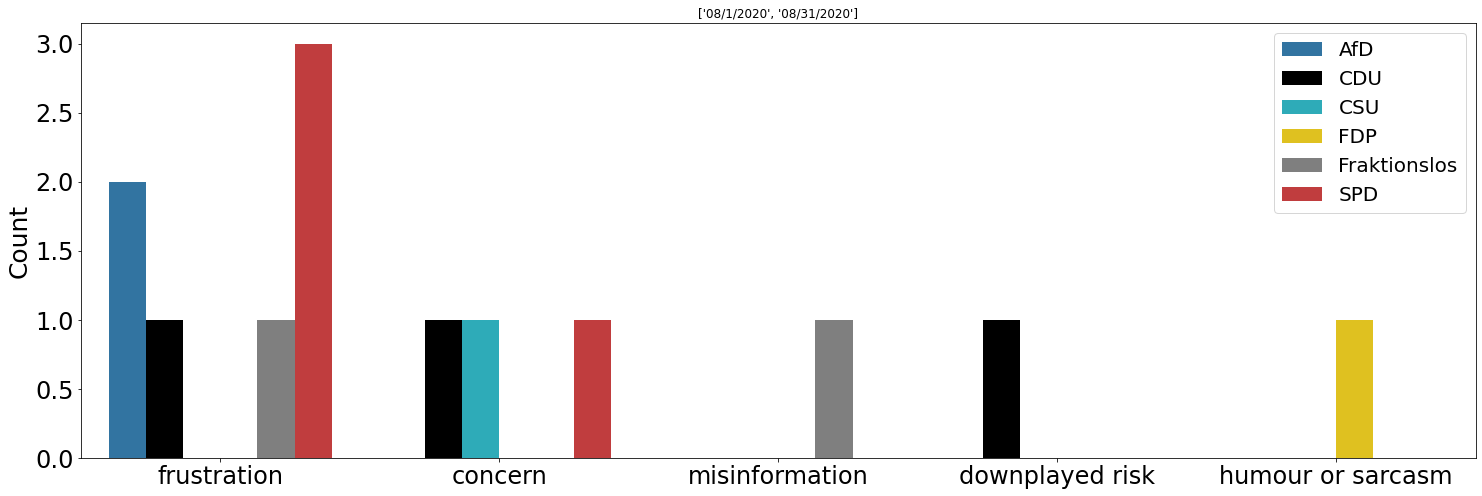

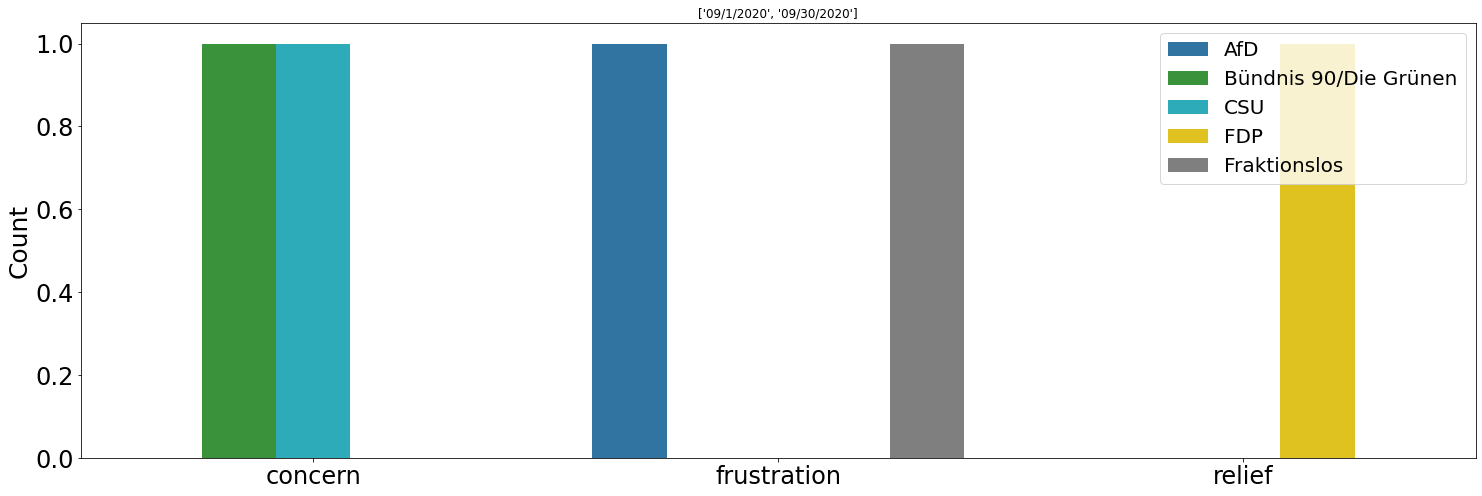

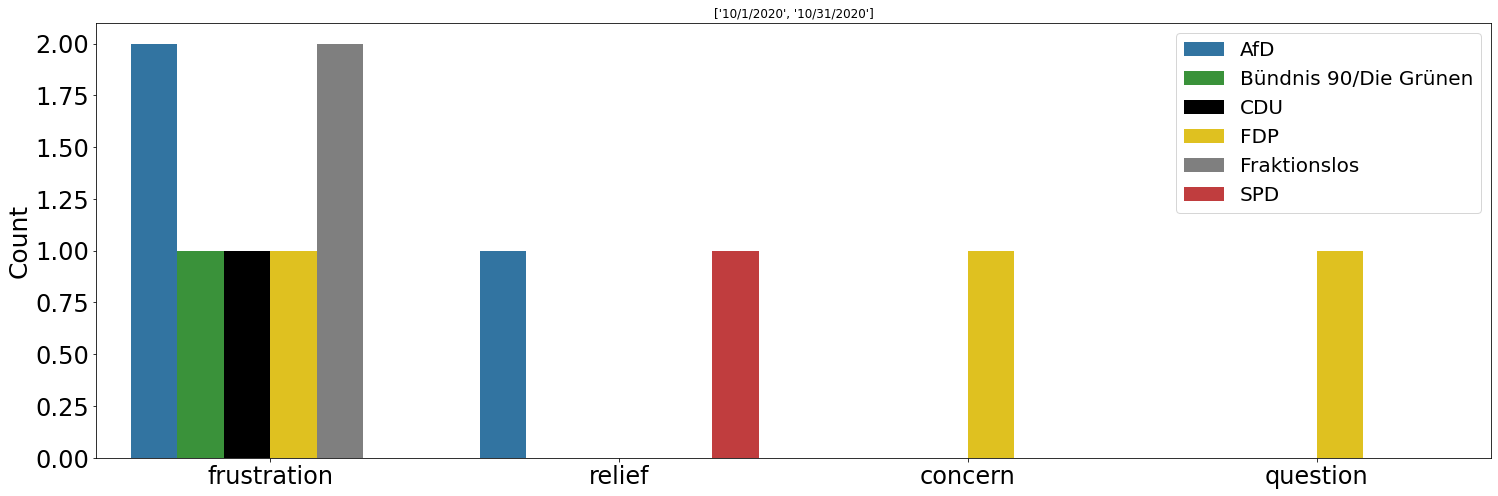

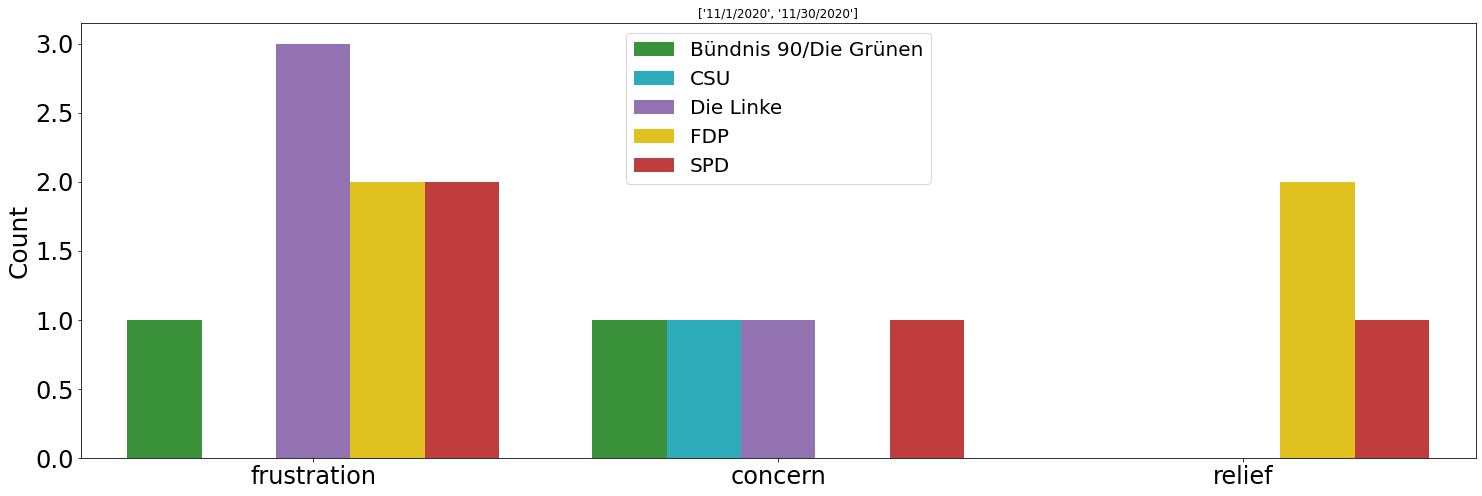

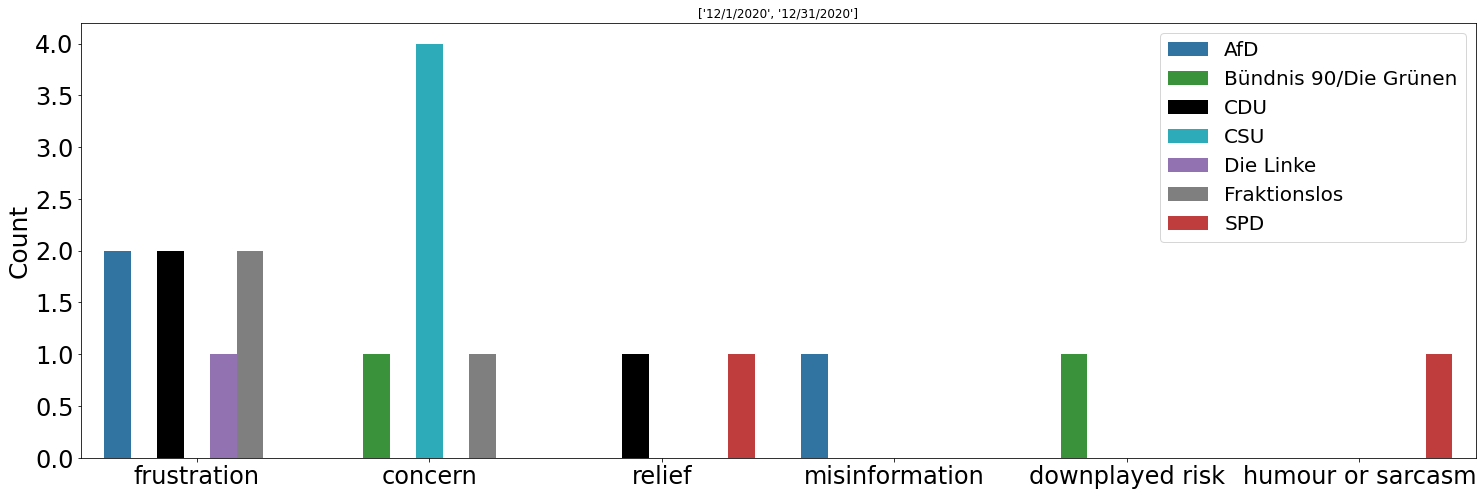

In [11]:
# All data
df_annotation = pd.read_csv('annotations_with_dates_and_parties.csv')
df_annotation = pd.DataFrame(df_annotation)
df_annotation = df_annotation.drop(['tweet_id'], axis='columns')
df_annotation['date']=pd.to_datetime(df_annotation['date'], utc= True).dt.date
for dates in start_end_date:
    df_annotations_per_month = df_annotation.loc[(df_annotation['date'] >= pd.to_datetime(dates[0], utc= True)) & (df_annotation['date'] <= pd.to_datetime(dates[1], utc=True))]
    if not df_annotations_per_month.empty:
        df_relevant_columns = df_annotations_per_month.drop('date', axis='columns')
        annotations = ((df_relevant_columns['annotation_qualifier'].value_counts(sort=True, ascending=False))).index.to_list()
        df_relevant_columns = df_relevant_columns.groupby(['party'])['annotation_qualifier'].value_counts(sort=True, ascending=False).unstack().fillna(0)
        df_relevant_columns = df_relevant_columns.rename_axis(None, axis=1)
        data_annotation = df_relevant_columns.reset_index().melt(id_vars=['party'], value_vars=annotations, var_name='annotation_qualifier', value_name='count')
        fig, ax = plt.subplots(figsize=(25,8))
        sns.barplot(x='annotation_qualifier', y='count', hue='party', data=data_annotation, palette=party_colors)
        plt.title(dates)
        plt.ylabel('Count', fontsize=25)
        plt.xlabel('', fontsize=2)
        plt.tick_params(labelsize=24)
        plt.legend(prop={'size': 20})
        plt.show()

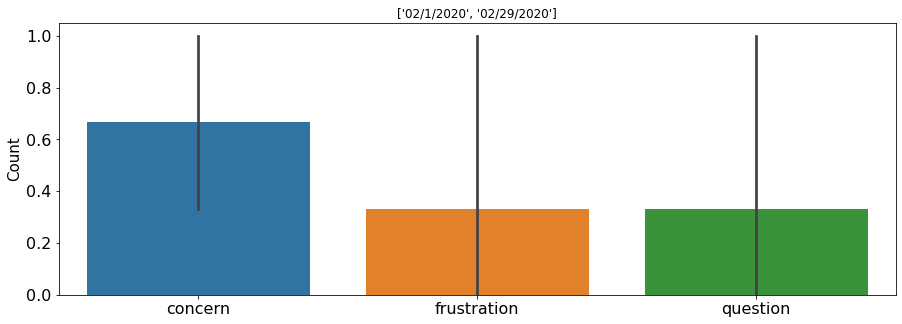

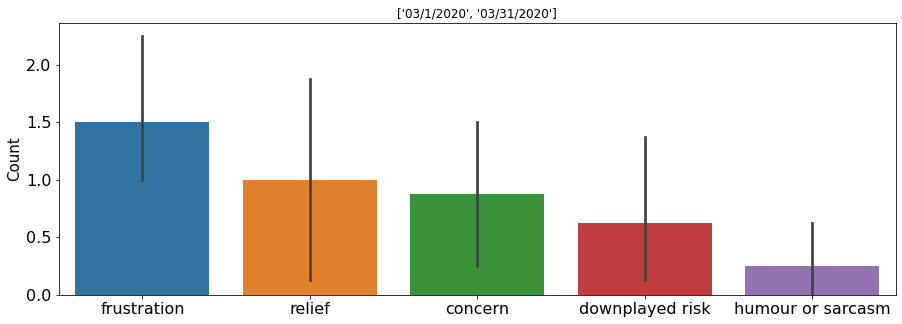

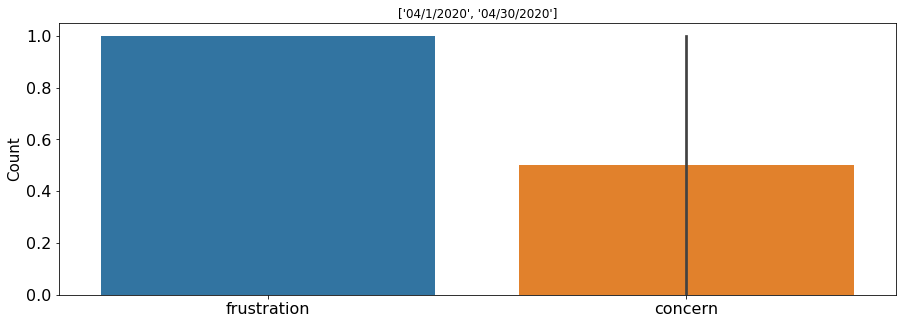

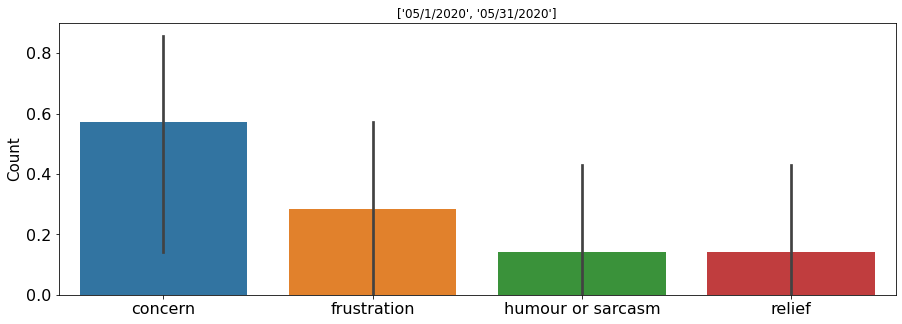

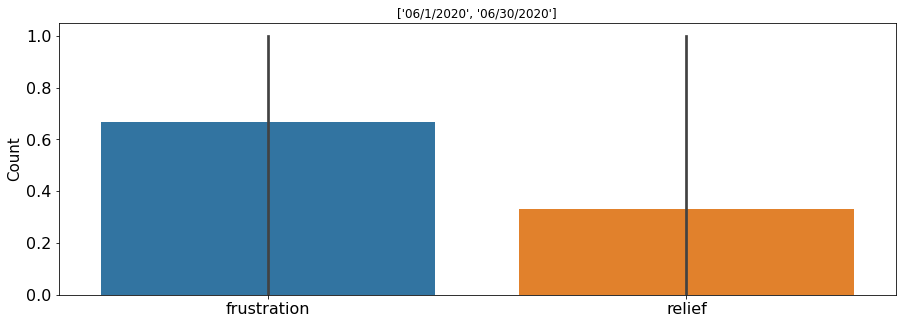

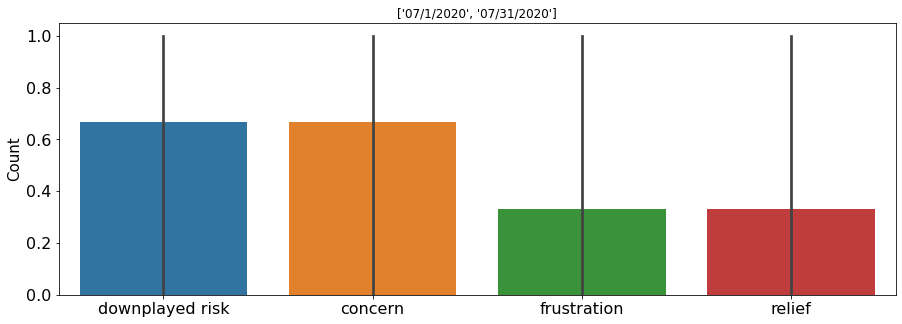

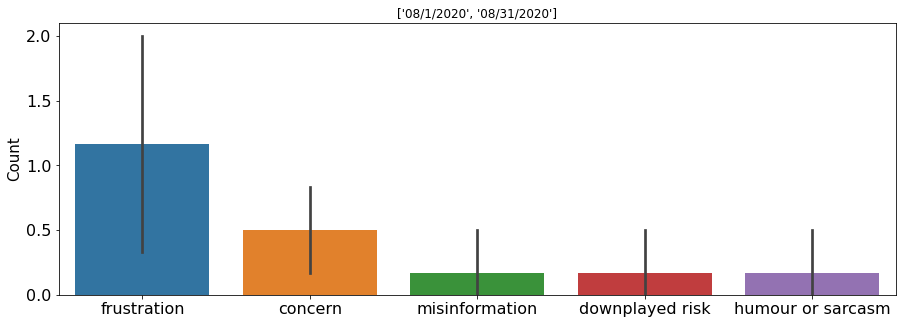

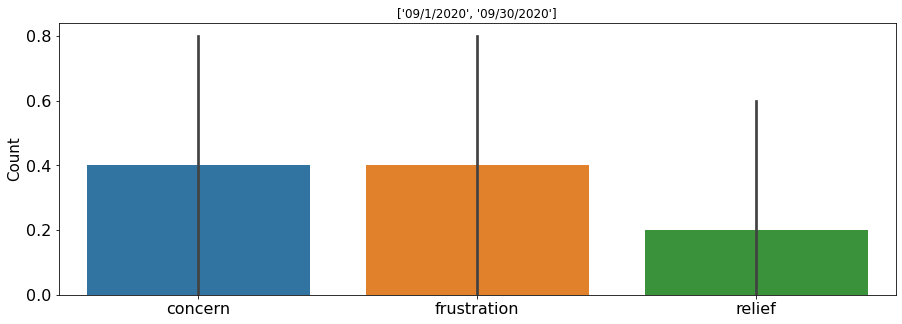

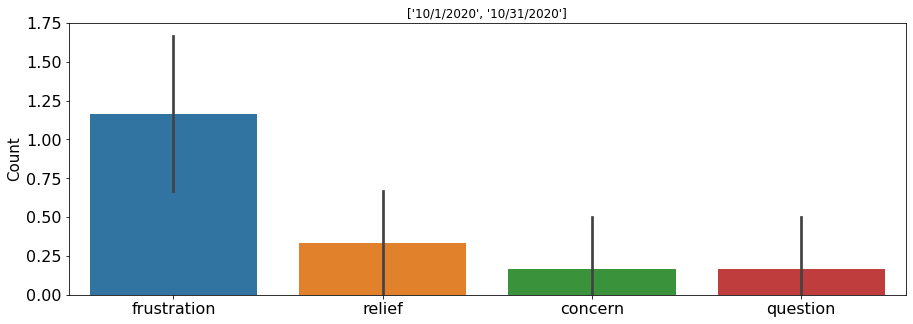

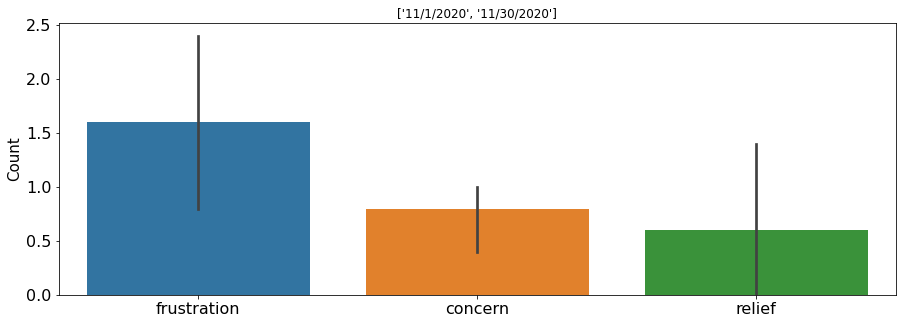

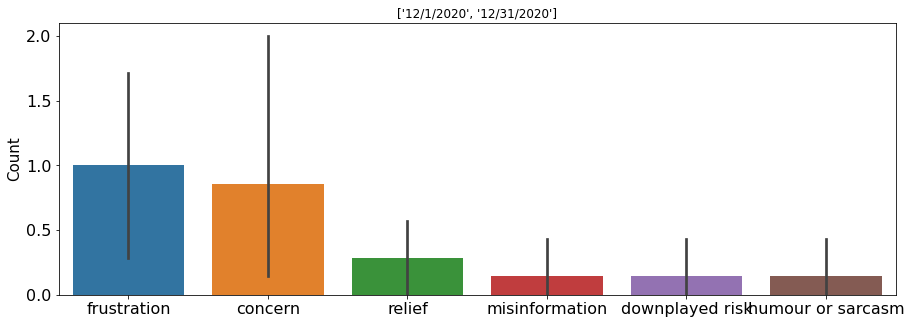

In [12]:
# All data
df_annotation = pd.read_csv('annotations_with_dates_and_parties.csv')
df_annotation = pd.DataFrame(df_annotation)
df_annotation = df_annotation.drop(['tweet_id'], axis='columns')
df_annotation['date']=pd.to_datetime(df_annotation['date'], utc= True).dt.date
for dates in start_end_date:
    df_annotations_per_month = df_annotation.loc[(df_annotation['date'] >= pd.to_datetime(dates[0], utc= True)) & (df_annotation['date'] <= pd.to_datetime(dates[1], utc=True))]
    if not df_annotations_per_month.empty:
        df_relevant_columns = df_annotations_per_month.drop('date', axis='columns')
        annotations = ((df_relevant_columns['annotation_qualifier'].value_counts(sort=True, ascending=False))).index.to_list()
        df_relevant_columns = df_relevant_columns.groupby(['party'])['annotation_qualifier'].value_counts(sort=True, ascending=False).unstack().fillna(0)
        df_relevant_columns = df_relevant_columns.rename_axis(None, axis=1)
        data_annotation = df_relevant_columns.reset_index().melt(id_vars=['party'], value_vars=annotations, var_name='annotation_qualifier', value_name='count')
        fig, ax = plt.subplots(figsize=(15,5))
        sns.barplot(x='annotation_qualifier', y='count', data=data_annotation)
        plt.title(dates)
        plt.ylabel('Count', fontsize=15)
        plt.xlabel('', fontsize=2)
        plt.tick_params(labelsize=16)
        plt.show()